In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
Independent= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/EucDist_Road3_CCentre2_Resid4_Ind3_PrCentre4_Tour2_BQA_Masked_Norm.tif")

#### Dependent has to be drivers2 since it has the most accurate results
Dependent = rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/LULC_2008_2000.tif")
Dependent2 = rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/LULC_2018_2008.tif")
Dsm = rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/DSM_30m_GeomCorr_Masked_Filled_by_Line_error_Norm.tif")
Slope = rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/SLOPE_from_DSM_Norm.tif")

#### The population data here comes from the folder Drivers2/Pop_Density that represents pop density equally distributed around each district boundarie. 2024 not modified since we dont plan to use
pop2000= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/Pop_Density/Pop_Dense_2000_added_New_Clip_IDW_pwr10_Msk_0_1.tif")
pop2008= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/Pop_Density/Pop_Dense_2008_added_New_Clip_IDW_pwr10_Msk_0_1.tif")
pop2018= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/Pop_Density/Pop_Dense_2018_added_New_Clip_IDW_pwr10_Msk_0_1.tif")
pop2024= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Drivers/Pop_Density/Pop_Dense_2024_added_New_Clip_IDW_pwr10_Msk_0_1.tif")
 
LULC_2008_2000 = np.ma.masked_outside(Dependent.read(1),0,1)
LULC_2018_2008 = np.ma.masked_outside(Dependent2.read(1),0,1)
 
####We put LULC_2018_2008 first because in pandas pixels are lost based to match the first input.
LULC = pd.DataFrame({"LULC_2018_2008":LULC_2018_2008[LULC_2018_2008==LULC_2018_2008], "LULC_2008_2000":LULC_2008_2000[LULC_2008_2000==LULC_2008_2000]})
LULC2=LULC.dropna()
LULC2.head()

,LULC_2018_2008,LULC_2008_2000
1490,0.0,0.0
1491,0.0,0.0
1492,0.0,0.0
1493,1.0,0.0
1494,1.0,0.0


In [3]:
Road_2000= np.ma.masked_values(Independent.read(1),Independent.nodata)
Road_2008_2018= np.ma.masked_values(Independent.read(2),Independent.nodata)
Road_Prop= np.ma.masked_values(Independent.read(3),Independent.nodata)
City_Centre_2000_2018= np.ma.masked_values(Independent.read(4),Independent.nodata)
City_Centre_Prop= np.ma.masked_values(Independent.read(5),Independent.nodata)
Residential_2000= np.ma.masked_values(Independent.read(6),Independent.nodata)
Residential_2008= np.ma.masked_values(Independent.read(7),Independent.nodata)
Residential_2018= np.ma.masked_values(Independent.read(8),Independent.nodata)
Residential_Prop= np.ma.masked_values(Independent.read(9),Independent.nodata)
Industrial_2000_2008= np.ma.masked_values(Independent.read(10),Independent.nodata)
Industrial_2018= np.ma.masked_values(Independent.read(11),Independent.nodata)
Industrial_Prop= np.ma.masked_values(Independent.read(12),Independent.nodata)
PrmCentre_2000= np.ma.masked_values(Independent.read(13),Independent.nodata)
PrmCentre_2008= np.ma.masked_values(Independent.read(14),Independent.nodata)
PrmCentre_2018= np.ma.masked_values(Independent.read(15),Independent.nodata)
PrmCentre_Prop= np.ma.masked_values(Independent.read(16),Independent.nodata)
Tourism_2000_2018= np.ma.masked_values(Independent.read(17),Independent.nodata)
Tourism_Prop= np.ma.masked_values(Independent.read(18),Independent.nodata)
DSM= np.ma.masked_values(Dsm.read(1), Dsm.nodata)
SLOPE = np.ma.masked_values(Slope.read(1), Slope.nodata)
Pop_2000 = np.ma.masked_values(pop2000.read(1), pop2000.nodata)
Pop_2008 = np.ma.masked_values(pop2008.read(1), pop2008.nodata)
Pop_2018 = np.ma.masked_values(pop2018.read(1), pop2018.nodata)
Pop_2024 = np.ma.masked_values(pop2024.read(1), pop2018.nodata)

## Independent variable: distance to the main ROADS

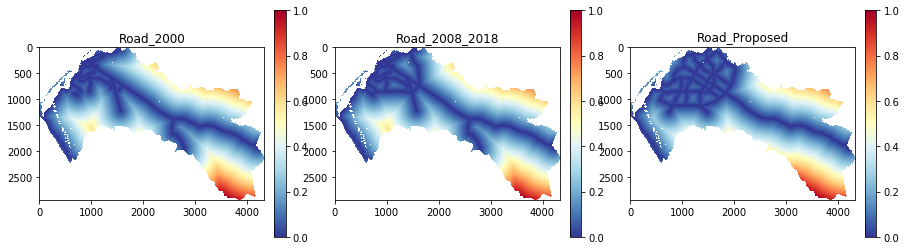

In [4]:
imgs=[{"Road_2000":Road_2000}, {"Road_2008_2018":Road_2008_2018}, {"Road_Proposed":Road_Prop}]
fig=plt.figure(figsize=(15, 15))
for i in range(1,len(imgs)+1):
    fig.add_subplot(1, 3, i)
    pos=plt.imshow(list(imgs[i-1].values())[0], cmap='RdYlBu_r')
    plt.colorbar(pos, fraction=0.046, pad=0.04)
    plt.title(list(imgs[i-1].keys())[0])
plt.show()


## Independent variable: distance to the PRIMARY_CENTRE

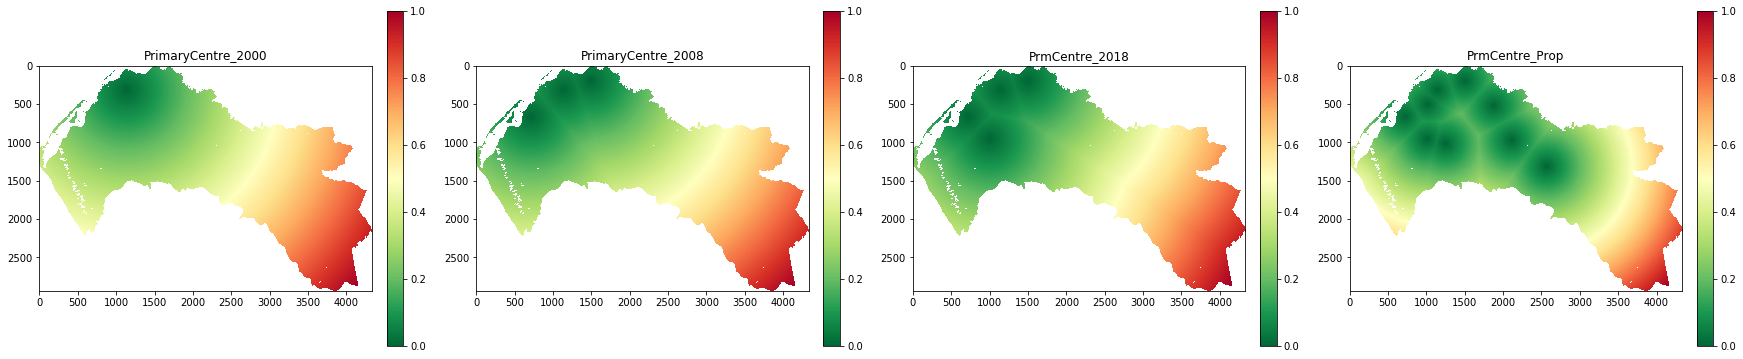

In [5]:
imgs=[{"PrimaryCentre_2000":PrmCentre_2000}, {"PrimaryCentre_2008":PrmCentre_2008}, {"PrmCentre_2018":PrmCentre_2018}, {"PrmCentre_Prop":PrmCentre_Prop}]
fig=plt.figure(figsize=(30, 30))
for i in range(1,len(imgs)+1):
    fig.add_subplot(1, 4, i)
    pos=plt.imshow(list(imgs[i-1].values())[0], cmap='RdYlGn_r')
    plt.colorbar(pos, fraction=0.046, pad=0.04)
    plt.title(list(imgs[i-1].keys())[0])
plt.show()

## Independent variable: distance to RESIDENTIAL_AREA

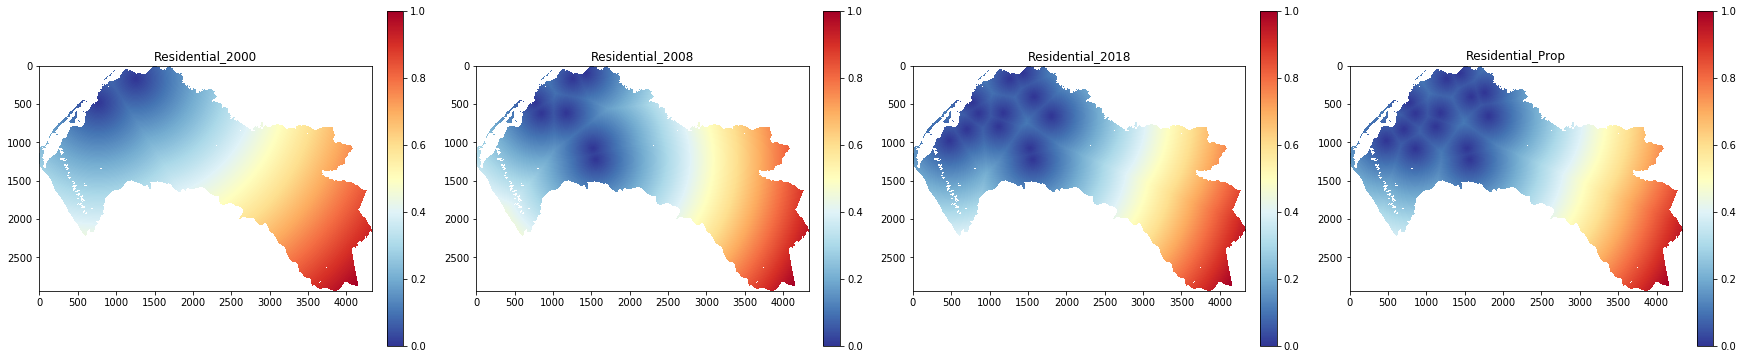

In [6]:
imgs=[{"Residential_2000":Residential_2000}, {"Residential_2008":Residential_2008}, {"Residential_2018":Residential_2018}, {"Residential_Prop":Residential_Prop}]
fig=plt.figure(figsize=(30, 30))
for i in range(1,len(imgs)+1):
    fig.add_subplot(1, 4, i)
    pos=plt.imshow(list(imgs[i-1].values())[0], cmap='RdYlBu_r')
    plt.colorbar(pos, fraction=0.046, pad=0.04)
    plt.title(list(imgs[i-1].keys())[0])
plt.show()

## Independent variable: DSM

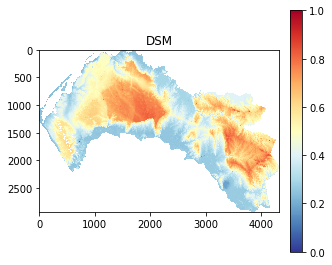

In [7]:
imgs=[{"DSM":DSM}]
fig=plt.figure(figsize=(16, 16))
for i in range(1,len(imgs)+1):
    fig.add_subplot(1, 3, i)
    pos=plt.imshow(list(imgs[i-1].values())[0], cmap='RdYlBu_r')
    plt.colorbar(pos, fraction=0.046, pad=0.04)
    plt.title(list(imgs[i-1].keys())[0])
plt.show()

## Independent variable: SLOPE.                   Better image seen in arcGIS !!

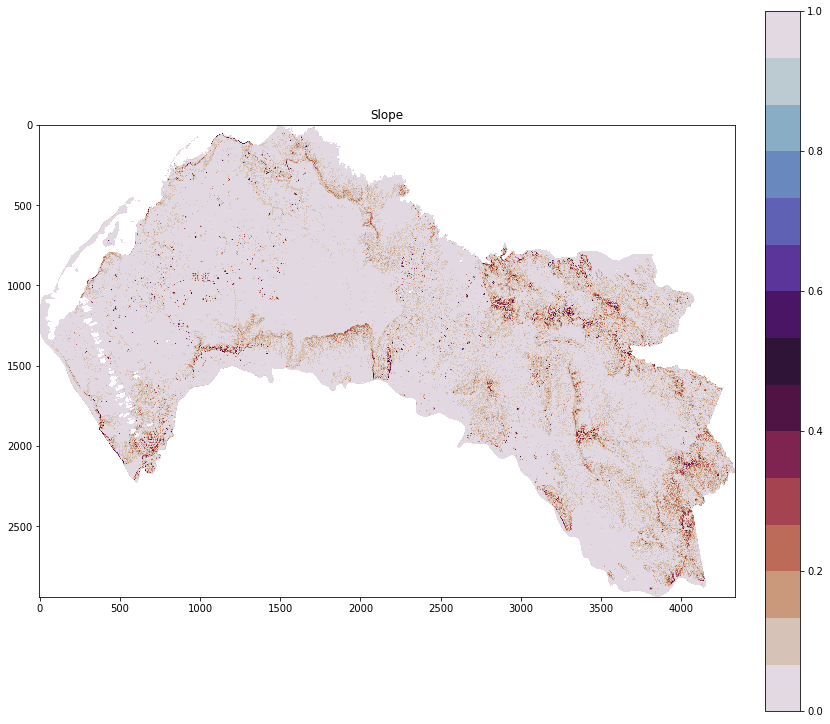

In [8]:
from matplotlib import cm
customised_color = cm.get_cmap('twilight_r', 15)
imgs=[{"Slope":SLOPE}]
fig=plt.figure(figsize=(30, 30))
for i in range(1,len(imgs)+1):
    fig.add_subplot(1, 2, i)
    pos=plt.imshow(list(imgs[i-1].values())[0], cmap=customised_color)
    plt.colorbar(pos, fraction=0.046, pad=0.04)
    plt.title(list(imgs[i-1].keys())[0])
plt.show()

## Independent variable: POPULATIO DENSITY

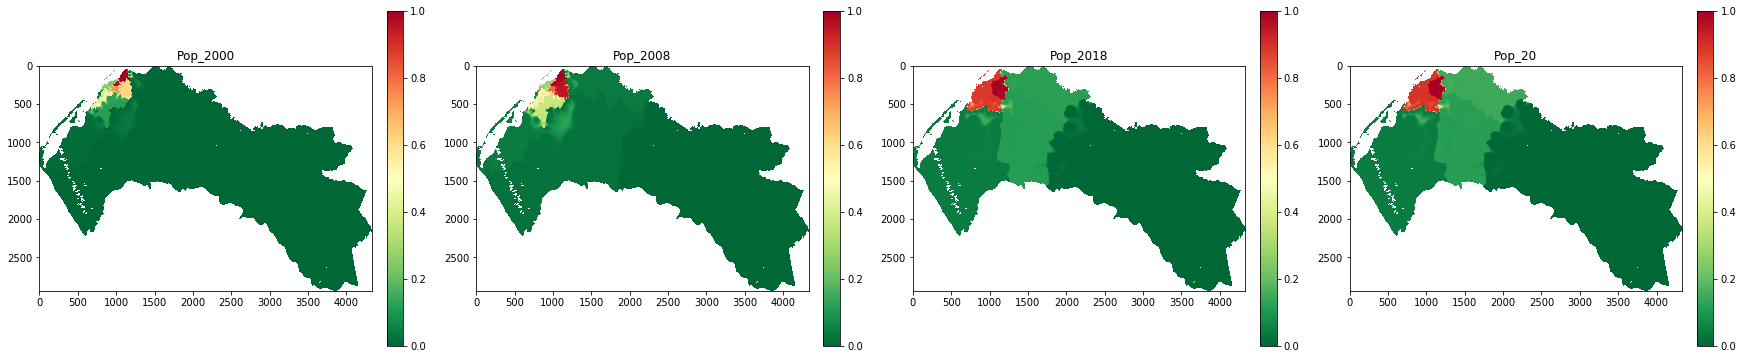

In [9]:

imgs=[{"Pop_2000":Pop_2000}, {"Pop_2008":Pop_2008}, {"Pop_2018":Pop_2018}, {"Pop_20":Pop_2024}]
fig=plt.figure(figsize=(30, 30))
for i in range(1,len(imgs)+1):
    fig.add_subplot(1, 4, i)
    pos=plt.imshow(list(imgs[i-1].values())[0], cmap='RdYlGn_r')
    plt.colorbar(pos, fraction=0.046, pad=0.04)
    plt.title(list(imgs[i-1].keys())[0])
plt.show()

In [10]:
DRIVERS= pd.DataFrame({"Road_2000":Road_2000[Road_2000==Road_2000], "Road_2008_2018":Road_2008_2018[Road_2008_2018==Road_2008_2018], "Road_Prop":Road_Prop[Road_Prop==Road_Prop], "City_Centre_2000_2018":City_Centre_2000_2018[City_Centre_2000_2018==City_Centre_2000_2018],"City_Centre_Prop":City_Centre_Prop[City_Centre_Prop==City_Centre_Prop],"Residential_2000":Residential_2000[Residential_2000==Residential_2000], "Residential_2008":Residential_2008[Residential_2008==Residential_2008],"Residential_2018":Residential_2018[Residential_2018==Residential_2018], "Residential_Prop":Residential_Prop[Residential_Prop==Residential_Prop], "Industrial_2000_2008":Industrial_2000_2008[Industrial_2000_2008==Industrial_2000_2008], "Industrial_2018":Industrial_2018[Industrial_2018==Industrial_2018], "Industrial_Prop":Industrial_Prop[Industrial_Prop==Industrial_Prop], "PrmCentre_2000":PrmCentre_2000[PrmCentre_2000==PrmCentre_2000], "PrmCentre_2008":PrmCentre_2008[PrmCentre_2008==PrmCentre_2008], "PrmCentre_2018":PrmCentre_2018[PrmCentre_2018==PrmCentre_2018], "PrmCentre_Prop":PrmCentre_Prop[PrmCentre_Prop==PrmCentre_Prop], "Tourism_2000_2018":Tourism_2000_2018[Tourism_2000_2018==Tourism_2000_2018], "Tourism_Prop":Tourism_Prop[Tourism_Prop==Tourism_Prop],"DSM":DSM[DSM==DSM],"SLOPE":SLOPE[SLOPE==SLOPE], "Pop_2000":Pop_2000[Pop_2000==Pop_2000], "Pop_2008":Pop_2008[Pop_2008==Pop_2008], "Pop_2018":Pop_2018[Pop_2018==Pop_2018], "Pop_2024":Pop_2024[Pop_2024==Pop_2024]})
DRIVERS.head()

,Road_2000,Road_2008_2018,Road_Prop,City_Centre_2000_2018,City_Centre_Prop,Residential_2000,Residential_2008,Residential_2018,Residential_Prop,Industrial_2000_2008,...,PrmCentre_2018,PrmCentre_Prop,Tourism_2000_2018,Tourism_Prop,DSM,SLOPE,Pop_2000,Pop_2008,Pop_2018,Pop_2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
DRIVERS2 = DRIVERS.dropna()
DRIVERS2.head()

,Road_2000,Road_2008_2018,Road_Prop,City_Centre_2000_2018,City_Centre_Prop,Residential_2000,Residential_2008,Residential_2018,Residential_Prop,Industrial_2000_2008,...,PrmCentre_2018,PrmCentre_Prop,Tourism_2000_2018,Tourism_Prop,DSM,SLOPE,Pop_2000,Pop_2008,Pop_2018,Pop_2024
1489,0.057498,0.057498,0.056622,0.159269,0.168837,0.073602,0.038544,0.038544,0.038544,0.115413,...,0.054869,0.091252,0.262734,0.262734,0.246667,0.025032,0.004569,0.041645,0.124226,0.14833
1490,0.057292,0.057292,0.056414,0.159482,0.168880,0.073803,0.038705,0.038705,0.038705,0.115097,...,0.054863,0.091242,0.262482,0.262482,0.250000,0.025032,0.004569,0.041645,0.124226,0.14833
1491,0.057008,0.057008,0.056154,0.159694,0.168923,0.074004,0.038868,0.038868,0.038868,0.114781,...,0.054858,0.091235,0.262231,0.262231,0.250000,0.017702,0.004569,0.041645,0.124226,0.14833
1492,0.056730,0.056730,0.055871,0.159907,0.168967,0.074206,0.039033,0.039033,0.039033,0.114465,...,0.054855,0.091229,0.261980,0.261980,0.253333,0.013995,0.004569,0.041645,0.124226,0.14833
1493,0.056464,0.056464,0.055601,0.160120,0.169011,0.074407,0.039201,0.039201,0.039201,0.114150,...,0.054853,0.091226,0.261729,0.261729,0.253333,0.006259,0.004569,0.041645,0.124226,0.14833


In [12]:
LULC3=LULC2
DRIVERS2.keys()

Index(['Road_2000', 'Road_2008_2018', 'Road_Prop', 'City_Centre_2000_2018',
       'City_Centre_Prop', 'Residential_2000', 'Residential_2008',
       'Residential_2018', 'Residential_Prop', 'Industrial_2000_2008',
       'Industrial_2018', 'Industrial_Prop', 'PrmCentre_2000',
       'PrmCentre_2008', 'PrmCentre_2018', 'PrmCentre_Prop',
       'Tourism_2000_2018', 'Tourism_Prop', 'DSM', 'SLOPE', 'Pop_2000',
       'Pop_2008', 'Pop_2018', 'Pop_2024'],
      dtype='object')

In [13]:
##### the following operation makes "DRIVERS" lose some pixels to match the pixels of the 2018 classified map
LULC3[['Road_2000', 'Road_2008_2018', 'Road_Prop', 'City_Centre_2000_2018',
       'City_Centre_Prop', 'Residential_2000', 'Residential_2008',
       'Residential_2018', 'Residential_Prop', 'Industrial_2000_2008',
       'Industrial_2018', 'Industrial_Prop', 'PrmCentre_2000',
       'PrmCentre_2008', 'PrmCentre_2018', 'PrmCentre_Prop',
       'Tourism_2000_2018', 'Tourism_Prop', 'DSM', 'SLOPE', 'Pop_2000',
       'Pop_2008', 'Pop_2018', 'Pop_2024']]= DRIVERS2[['Road_2000', 'Road_2008_2018', 'Road_Prop', 'City_Centre_2000_2018',
       'City_Centre_Prop', 'Residential_2000', 'Residential_2008',
       'Residential_2018', 'Residential_Prop', 'Industrial_2000_2008',
       'Industrial_2018', 'Industrial_Prop', 'PrmCentre_2000',
       'PrmCentre_2008', 'PrmCentre_2018', 'PrmCentre_Prop',
       'Tourism_2000_2018', 'Tourism_Prop', 'DSM', 'SLOPE', 'Pop_2000',
       'Pop_2008', 'Pop_2018', 'Pop_2024']]

In [14]:
LULC3.head()

,LULC_2018_2008,LULC_2008_2000,Road_2000,Road_2008_2018,Road_Prop,City_Centre_2000_2018,City_Centre_Prop,Residential_2000,Residential_2008,Residential_2018,...,PrmCentre_2018,PrmCentre_Prop,Tourism_2000_2018,Tourism_Prop,DSM,SLOPE,Pop_2000,Pop_2008,Pop_2018,Pop_2024
1490,0.0,0.0,0.057292,0.057292,0.056414,0.159482,0.168880,0.073803,0.038705,0.038705,...,0.054863,0.091242,0.262482,0.262482,0.250000,0.025032,0.004569,0.041645,0.124226,0.14833
1491,0.0,0.0,0.057008,0.057008,0.056154,0.159694,0.168923,0.074004,0.038868,0.038868,...,0.054858,0.091235,0.262231,0.262231,0.250000,0.017702,0.004569,0.041645,0.124226,0.14833
1492,0.0,0.0,0.056730,0.056730,0.055871,0.159907,0.168967,0.074206,0.039033,0.039033,...,0.054855,0.091229,0.261980,0.261980,0.253333,0.013995,0.004569,0.041645,0.124226,0.14833
1493,1.0,0.0,0.056464,0.056464,0.055601,0.160120,0.169011,0.074407,0.039201,0.039201,...,0.054853,0.091226,0.261729,0.261729,0.253333,0.006259,0.004569,0.041645,0.124226,0.14833
1494,1.0,0.0,0.056212,0.056212,0.055345,0.160333,0.169056,0.074610,0.039370,0.039370,...,0.054852,0.091225,0.261478,0.261478,0.253333,0.018776,0.004569,0.041645,0.124226,0.14833


In [15]:
import statsmodels.api as sm
LULC4=LULC3[["LULC_2008_2000","LULC_2018_2008"]].astype("int")
LULC4.head()

,LULC_2008_2000,LULC_2018_2008
1490,0,0
1491,0,0
1492,0,0
1493,0,1
1494,0,1


In [16]:
#### We should pay attention when shifting from 2008 prediction(y1) to 2018 prediction (y2)
y1 = np.ravel(LULC4["LULC_2008_2000"])
y2 = np.ravel(LULC4["LULC_2018_2008"])
from sklearn.model_selection import train_test_split

#####
##### Predicting 2008
X=sm.tools.add_constant(LULC3[['Road_2000', 'Residential_2000', "DSM", "SLOPE", "Pop_2000"]], has_constant = "add")
X_train, X_test, y_train, y_test = train_test_split( X, y1, test_size=0.2, random_state=4)
x_2000= X_train
y_2000=y_train
model = sm.Logit(y_2000,x_2000)
result= model.fit()

Optimization terminated successfully.
         Current function value: 0.054533
         Iterations 13


In [17]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.476      
Dependent Variable:  y                 AIC:               507287.6348
Date:                2021-04-17 12:47  BIC:               507367.7505
No. Observations:    4651121           Log-Likelihood:    -2.5364e+05
Df Model:            5                 LL-Null:           -4.8438e+05
Df Residuals:        4651115           LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      13.0000                                         
---------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
const             -2.1154   0.0210 -100.5465 0.0000  -2.1566  -2.0742
Road_2000        -16.7720   0.0983 -170.6653 0.0000 -16.9646 -16.5794
Residential_2000 -28.1293   0.1150 -244.6386 0.0000 -28.3547 -27.9039
DSM                7.1287   0.0485  146.8943 0.0000   7.0336   7.2238
SLOPE             -2.9964   0.1062  -28.2134 0.0000  -3.2046  -2.7883
Pop_2000          -1.6896   0.0197  -85.6817 0.0000  -1.7282  -1.6509
=====================================================================

"""

In [18]:
#### Multicolinearity
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["drivers"]= X.columns
vif.round(1)

,VIF Factor,drivers
0,16.6,const
1,1.5,Road_2000
2,1.4,Residential_2000
3,1.1,DSM
4,1.0,SLOPE
5,1.1,Pop_2000


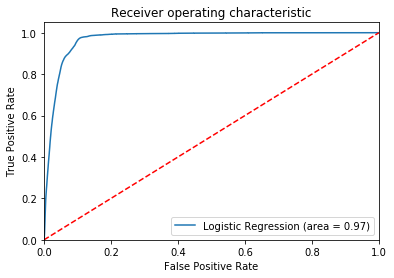

In [19]:
####Roc Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, result.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

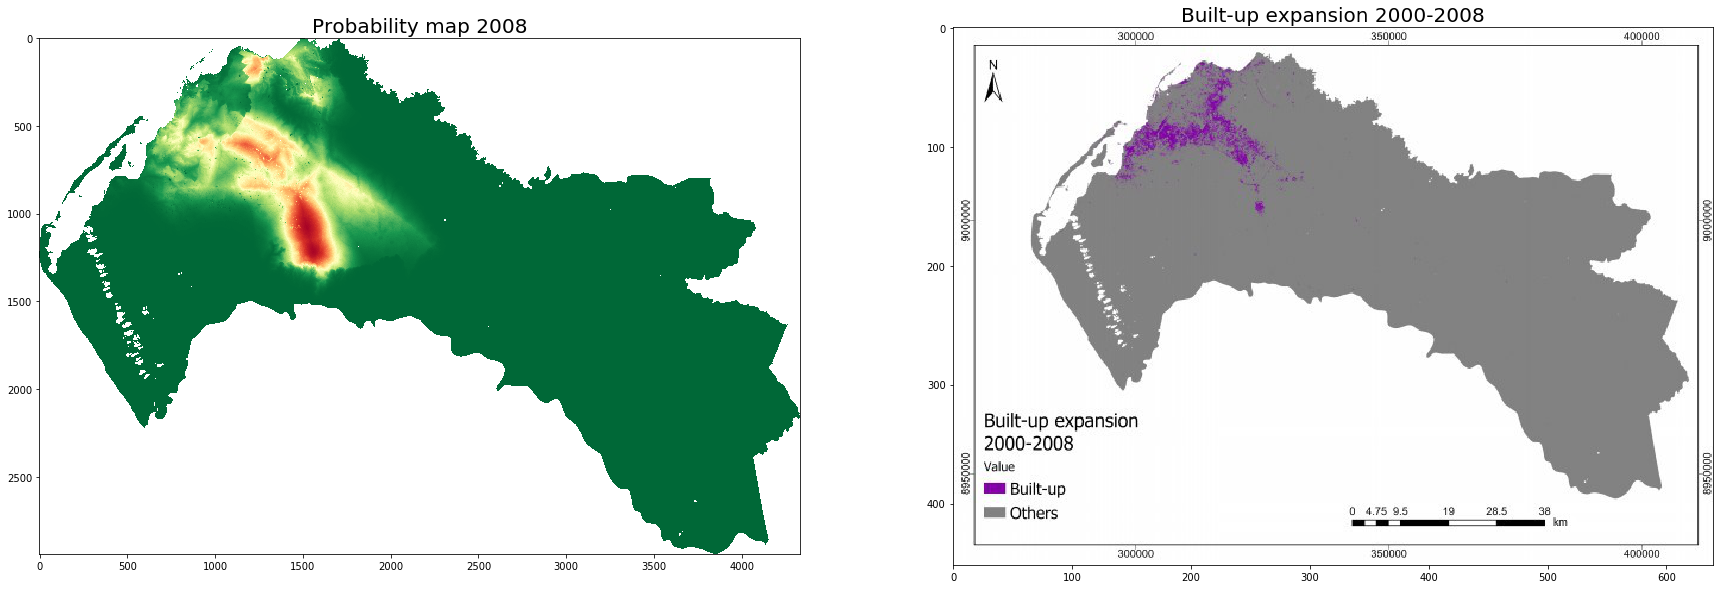

In [20]:
###### Writing the predicted image
from matplotlib import cm
customised_color = cm.get_cmap('RdYlGn_r')

W=sm.tools.add_constant(LULC3[['Road_2008_2018', 'Residential_2008', "DSM", "SLOPE", "Pop_2008"]], has_constant = "add")
predictions= result.predict(W)
Z= pd.DataFrame({"A":predictions})
Z_Reindexed = Z.set_index(LULC3.index)
LULC["A"]= Z_Reindexed["A"]
Result = LULC["A"].astype("float32")
im = np.reshape(Result.values, (LULC_2008_2000.shape[0], LULC_2008_2000.shape[1] ))

classified_map_2008="Built-up_expansion_2000_2008.jpg"
classified_map_2008=np.asarray(Image.open(classified_map_2008))
fig=plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im, cmap=customised_color)
plt.title("Probability map 2008", fontsize=20)

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(classified_map_2008)
plt.title("Built-up expansion 2000-2008", fontsize=20)
plt.show()

In [21]:
##### We have to create a variable lets say PQk that corresponds to the classified map from PqKmeans algorithm. since it was upscaled to 30m resolution, some pixels were lost so, we have to use its Nodata values to write our raster!!

# UNCOMMENT TO SAVE THE IMAGE

# PQk = rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Program_Result/L8_PqKm_NDBI_MEI_VIGS_DBI_Qz_Calcite_VV_VH_K8_8bits_DMask.tif")
# Probability_map = rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/PYTHON/Program_Result/Prediction_2008_Driver3_VIF5.tif", "w", driver = "GTiff", height = LULC_2018_2008.shape[0], width = LULC_2018_2008.shape[1], dtype = "float32", count = 1, nodata = PQk.nodata, crs = "+proj = utm", transform = Dependent2.transform)

# Probability_map.write(im, 1)
# Probability_map.close()

In [22]:
#######
##########
### predicting 2018 VIF5
X=sm.tools.add_constant(LULC3[['Road_2008_2018', 'Residential_2008', 'DSM', 'SLOPE', 'Pop_2008']], has_constant = "add")
#### y2
X_train, X_test, y_train, y_test = train_test_split( X, y2, test_size=0.2, random_state=4)
x_2000= X_train
y_2000=y_train
model = sm.Logit(y_2000,x_2000)
result= model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.135251
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit            Pseudo R-squared: 0.360       
Dependent Variable:   y                AIC:              1258150.8985
Date:                 2021-04-17 12:48 BIC:              1258231.0142
No. Observations:     4651121          Log-Likelihood:   -6.2907e+05 
Df Model:             5                LL-Null:          -9.8243e+05 
Df Residuals:         4651115          LLR p-value:      0.0000      
Converged:            1.0000           Scale:            1.0000      
No. Iterations:       11.0000                                        
---------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
const              1.0963   0.0106  103.3990 0.0000   1.0755   1.1171
Road_2008_2018    -9.8108   0.0376 -260.8716 0.0000  -9.8845  -9.7371
Residential_2008 -12.3907   0.0345 -359.5805 0.0000 -12.4582 -12.3231
DSM               -1.5689   0.0155 -101.4457 0.0000  -1.5993  -1.5386
SLOPE              0.6940   0.0498   13.9309 0.0000   0.5964   0.7917
Pop_2008          -1.4788   0.0140 -105.9637 0.0000  -1.5061  -1.4514
=====================================================================

"""

In [23]:
vif = pd.DataFrame()
vif["VIF Factor"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["drivers"]= X.columns
vif.round(1)

,VIF Factor,drivers
0,16.7,const
1,1.6,Road_2008_2018
2,1.6,Residential_2008
3,1.2,DSM
4,1.0,SLOPE
5,1.1,Pop_2008


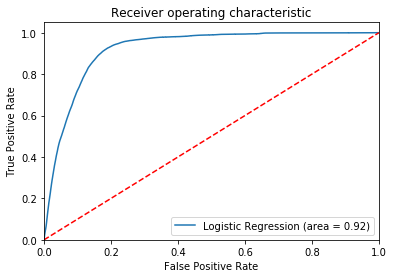

In [24]:
####Roc Curve 2018
logit_roc_auc = roc_auc_score(y_test, result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, result.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

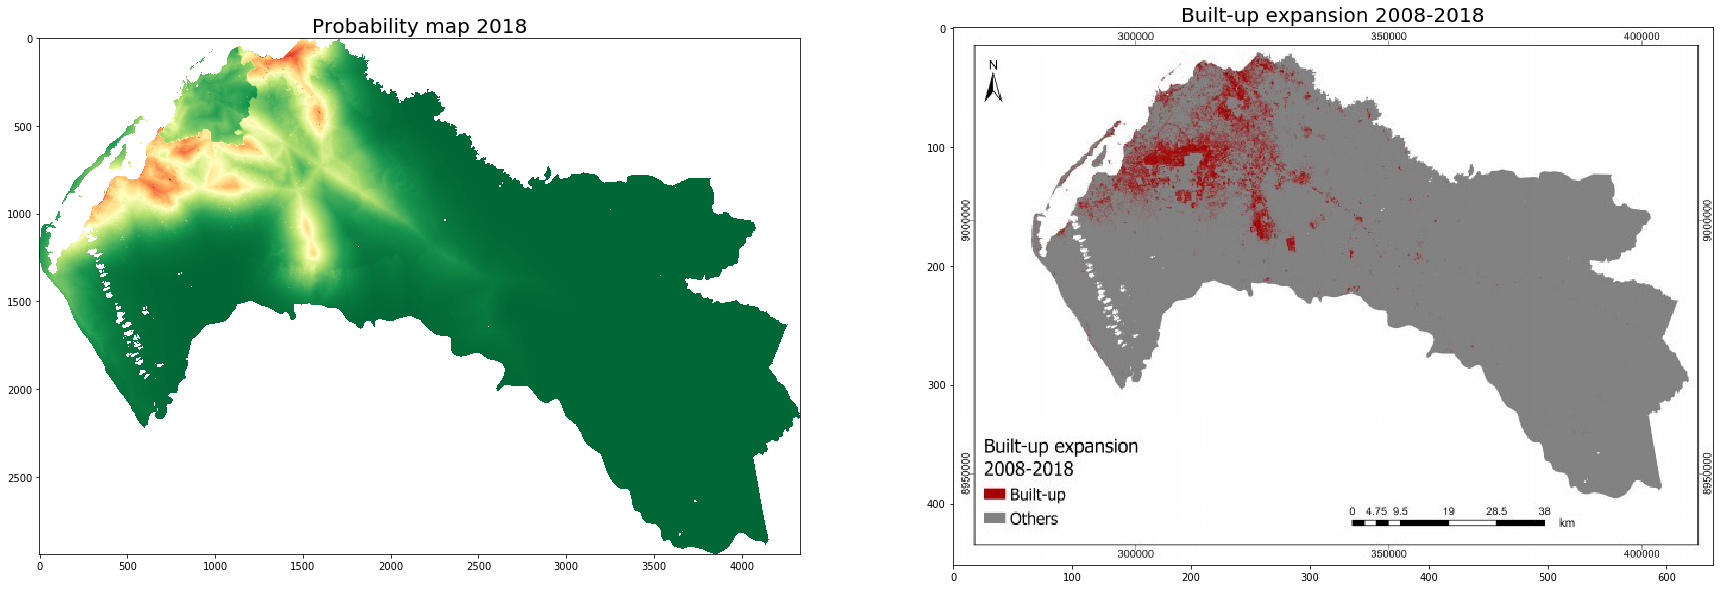

In [25]:
######
###### Writing the predicted image
from matplotlib import cm
customised_color = cm.get_cmap('RdYlGn_r')

W=sm.tools.add_constant(LULC3[['Road_2008_2018','Residential_2018', 'DSM', 'SLOPE', 'Pop_2018']], has_constant = "add")
predictions= result.predict(W)
Z= pd.DataFrame({"A":predictions})
Z_Reindexed = Z.set_index(LULC3.index)
LULC["A"]= Z_Reindexed["A"]
Result = LULC["A"].astype("float32")
im = np.reshape(Result.values, (LULC_2008_2000.shape[0], LULC_2008_2000.shape[1] ))
# plt.figure(figsize=(20,10))
# plt.imshow(im, cmap=customised_color)
# plt.show()

classified_map_2018="Built-up_expansion_2008_2018.jpg"
classified_map_2018=np.asarray(Image.open(classified_map_2018))
fig=plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im, cmap=customised_color)
plt.title("Probability map 2018", fontsize=20)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(classified_map_2018)
plt.title("Built-up expansion 2008-2018", fontsize=20)
plt.show()

In [26]:
# UNCOMMENT TO SAVE THE IMAGE

# KMean_output = rasterio.open(r"C:\Users\arngo\Desktop\PYTHON\Program_Result\Prediction_2018_Driver3_VIF5.tif", "w", driver = "GTiff", height = LULC_2018_2008.shape[0], width = LULC_2018_2008.shape[1], dtype = "float32", count = 1, nodata = PQk.nodata, crs = "+proj = utm", transform = Dependent2.transform)
# KMean_output.write(im, 1)
# KMean_output.close()